## Word2-vec sentiment analysis

In [1]:
from collections import Counter
import os
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from  nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jarkk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jarkk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data into dataframe

Source for dataset
- https://www.kaggle.com/kazanova/sentiment140/data#

In [2]:
dataset_path = os.getcwd()
dataset_path = os.path.join(dataset_path, "data")
dataset_path = os.path.join(dataset_path, "training.1600000.processed.noemoticon.csv")
print(dataset_path)

C:\Users\jarkk\PycharmProjects\aalto-snlp-2020\data\training.1600000.processed.noemoticon.csv


In [3]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
#dataset_path = r'train.csv'
df = pd.read_csv(dataset_path, 
                 encoding =DATASET_ENCODING, 
                 names=DATASET_COLUMNS,
                 usecols=[0, 5],
                 nrows=100000)


In [4]:
print(f"Dataset size is {df.shape}")
df.head()

Dataset size is (100000, 2)


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Show label

In [5]:
decode_map = {0: 0, 2: "NEUTRAL", 4: 1}
def decode_sentiment(label):
    return decode_map[int(label)]

df.target = df.target.apply(lambda x: decode_sentiment(x))

Text(0.5, 1.0, 'Dataset labels distribuition')

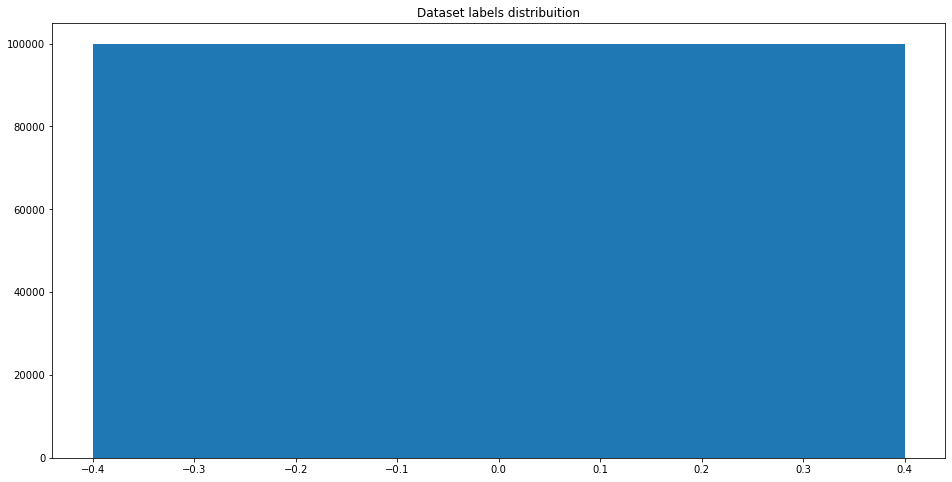

In [6]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

## Preprocess tweets

- remove urls and hastags
- remove stop words
- do stemming

In [7]:
def preprocess(text, stop_words, stem=False, stemmer=None):
    # Remove link,user and special characters
    TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [8]:
text = df['text'].values
print(text[0])

stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer("english")

df.text = df.text.apply(lambda x: preprocess(x, stop_words, stem=True, stemmer=stemmer))
# processed_text = preprocess(text)
# print(processed_text[0])
df.dropna(axis=0, inplace=True)

text_processed = df['text'].values
print(text[0])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
awww bummer shoulda got david carr third day


In [9]:
df.head()

,target,text
0,0,awww bummer shoulda got david carr third day
1,0,upset updat facebook text might cri result sch...
2,0,dive mani time ball manag save 50 rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav mad see


## Split data into train and test datasets

In [10]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=10, shuffle=True)

df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=10, shuffle=True)

In [11]:
df_train.to_csv("data/processed_train.csv", index=False)
df_val.to_csv("data/processed_val.csv", index=False)
df_test.to_csv("data/processed_test.csv", index=False)

In [12]:
df_train = pd.read_csv("data/processed_train.csv")
df_train.head()

,target,text
0,0,wonder everytim got drunk woke earli sleep
1,0,got go back place today easter holiday see fri...
2,0,youtub miley cyrus caus watch much tv
3,0,realli gonna miss kid hate chang
4,0,need sudaf claritin someth
